# Лаб 3 
## Вариант 2
M = 53

In [33]:
from random import random
import random as rnd

def factor(n):
    ans = []
    d = 2
    while d * d <= n:
        if n % d == 0:
            ans.append(d)
            n //= d
        else:
            d += 1
    if n > 1:
        ans.append(n)
    return ans


def is_prime(n):
    d = 2
    while n % d != 0:
        d += 1
    return d == n


def smallest_prime(factors):
    answer = None
    for factor in factors:
        if is_prime(factor) and (answer is None or answer <= factor):
            answer = factor
            
    return answer

def on_curve(p, a, b):
    if p is None:
        return True
    x = p[0]
    y = p[1]
    return (y ** 2) % M == (x ** 3 + a * x + b) % M 

1. Для заданного M определить значения a и b, которые позволяют построить эллиптическую группу EM(a, b).

In [34]:
M = 53
ab = []

def check(a, b):
    return (4 * a ** 3 + 27 * b ** 2) % M is not 0

for i in range (-M + 1, M):
    for j in range (-M + 1, M):
        if check(i, j):
            p = 1
            for x in range(M):
                for y in range(M):
                    if on_curve((x, y), i, j):
                        p += 1
            if is_prime(p):
                ab.append(((i, j), p))
print(len(ab))
print(ab)

1144
[((-52, -45), 61), ((-52, -35), 43), ((-52, -18), 43), ((-52, -8), 61), ((-52, 8), 61), ((-52, 18), 43), ((-52, 35), 43), ((-52, 45), 61), ((-51, -52), 59), ((-51, -43), 59), ((-51, -31), 67), ((-51, -22), 67), ((-51, -10), 59), ((-51, -1), 59), ((-51, 1), 59), ((-51, 10), 59), ((-51, 22), 67), ((-51, 31), 67), ((-51, 43), 59), ((-51, 52), 59), ((-50, -40), 59), ((-50, -32), 67), ((-50, -29), 59), ((-50, -24), 59), ((-50, -21), 67), ((-50, -13), 59), ((-50, 13), 59), ((-50, 21), 67), ((-50, 24), 59), ((-50, 29), 59), ((-50, 32), 67), ((-50, 40), 59), ((-49, -49), 43), ((-49, -46), 53), ((-49, -42), 47), ((-49, -41), 53), ((-49, -12), 53), ((-49, -11), 47), ((-49, -7), 53), ((-49, -4), 43), ((-49, 4), 43), ((-49, 7), 53), ((-49, 11), 47), ((-49, 12), 53), ((-49, 41), 53), ((-49, 42), 47), ((-49, 46), 53), ((-49, 49), 43), ((-48, -40), 41), ((-48, -28), 53), ((-48, -25), 53), ((-48, -13), 41), ((-48, 13), 41), ((-48, 25), 53), ((-48, 28), 53), ((-48, 40), 41), ((-47, -52), 43), ((-4

In [35]:
def curve(a, b, x):
    return (x ** 3 + a * x + b) % M

def on_curve(p):
    if p is None:
        return True
    x = p[0]
    y = p[1]
    return (y ** 2) % M == (x ** 3 + a * x + b) % M 

2. Для найденных в задании 1 параметров сгенерировать все элементы эллиптической группы EM(a, b).

In [36]:
a, b = 45, -20
points = []

for x in range(M):
    for y in range(M):
        if on_curve((x, y)):
            points.append((x, y % M))
        
print(len(points))
print(points)

66
[(2, 5), (2, 48), (3, 6), (3, 47), (6, 25), (6, 28), (8, 2), (8, 51), (9, 1), (9, 52), (10, 23), (10, 30), (11, 2), (11, 51), (13, 18), (13, 35), (14, 11), (14, 42), (17, 26), (17, 27), (19, 3), (19, 50), (20, 20), (20, 33), (21, 13), (21, 40), (22, 8), (22, 45), (23, 12), (23, 41), (24, 16), (24, 37), (26, 21), (26, 32), (27, 7), (27, 46), (30, 9), (30, 44), (33, 14), (33, 39), (34, 2), (34, 51), (35, 4), (35, 49), (37, 26), (37, 27), (38, 8), (38, 45), (40, 22), (40, 31), (41, 16), (41, 37), (42, 3), (42, 50), (45, 3), (45, 50), (46, 8), (46, 45), (47, 17), (47, 36), (48, 1), (48, 52), (49, 1), (49, 52), (52, 26), (52, 27)]


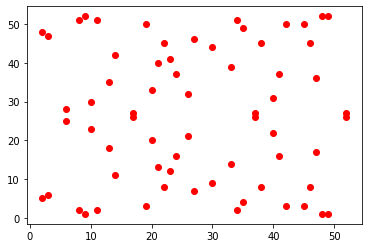

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_points(x, y):
    fig, ax = plt.subplots()
    plt.plot(x, y, 'ro')
    plt.show()
    
x = [point[0] for point in points]
y = [point[1] for point in points]
plot_points(x, y)

In [39]:
def extended_euclidean_algorithm(a, b):
    s, old_s = 0, 1
    t, old_t = 1, 0
    r, old_r = b, a

    while r != 0:
        quotient = old_r // r
        old_r, r = r, old_r - quotient * r
        old_s, s = s, old_s - quotient * s
        old_t, t = t, old_t - quotient * t

    return old_r, old_s, old_t


def inverse_mod(n, p):
    gcd, x, y = extended_euclidean_algorithm(n, p)
    assert (n * x + p * y) % p == gcd

    if gcd != 1:
        # Или n равно 0, или p не является простым.
        raise ValueError(
            '{} has no multiplicative inverse '
            'modulo {}'.format(n, p))
    else:
        return x % p

In [40]:
def point_add(point1, point2):
    assert on_curve(point1)
    assert on_curve(point2)

    if point1 is None:
        # 0 + point2 = point2
        return point2
    if point2 is None:
        # point1 + 0 = point1
        return point1

    x1, y1 = point1
    x2, y2 = point2

    if x1 == x2 and y1 != y2:
        # point1 + (-point1) = 0
        return None

    if x1 == x2:
        # This is the case point1 == point2.
        m = (3 * x1 * x1 + a) * inverse_mod(2 * y1, M)
    else:
        # This is the case point1 != point2.
        m = (y1 - y2) * inverse_mod(x1 - x2, M)

    x3 = m * m - x1 - x2
    y3 = y1 + m * (x3 - x1)
    result = (x3 % M,
              -y3 % M)

    assert on_curve(result)

    return result

def point_neg(point):
    assert on_curve(point)

    if point is None:
        # -0 = 0
        return None

    x, y = point
    result = (x, -y % M)

    assert on_curve(result)

    return result


def scalar_mult(k, point):
    assert on_curve(point)

    if k % n == 0 or point is None:
        return None

    if k < 0:
        # k * point = -k * (-point)
        return scalar_mult(-k, point_neg(point))

    result = None
    addend = point

    while k:
        if k & 1:
            # Add.
            result = point_add(result, addend)

        # Double.
        addend = point_add(addend, addend)

        k >>= 1

    assert on_curve(result)

    return result

In [41]:
N = len(points) + 1
n = smallest_prime(factor(N))
h = int(N / n)
print(n)
print(h)
G = points[int(random() * N - 1)]
while scalar_mult(h, G) is None:
    G = points[int(random() * N) - 1]
    
G = scalar_mult(h, G)
print('M : {}, a : {}, b : {}, n : {}, h : {}, G: ({}, {})'.format(M, a, b, n, h, *G))

67
1
M : 53, a : 45, b : -20, n : 67, h : 1, G: (37, 26)


In [42]:
def make_keypair():
    private_key = rnd.randrange(1, n)
    public_key = scalar_mult(private_key, G)

    return private_key, public_key

3. Реализовать алгоритм обмена ключами для эллиптической группы EM(a,b).

In [43]:
# M, a, b, n, h, G are defined 

alice_private_key, alice_public_key = make_keypair()
print("Alice's private key: {}".format(alice_private_key))
print("Alice's public key: ({}, {})".format(*alice_public_key))

bob_private_key, bob_public_key = make_keypair()
print("Bob's private key: {}".format(bob_private_key))
print("Bob's public key: ({}, {})".format(*bob_public_key))

# Alice and Bob exchange their public keys and calculate the shared secret.
s1 = scalar_mult(alice_private_key, bob_public_key)
s2 = scalar_mult(bob_private_key, alice_public_key)
assert s1 == s2

print('Shared secret: ({}, {})'.format(*s1))

Alice's private key: 35
Alice's public key: (35, 49)
Bob's private key: 16
Bob's public key: (42, 50)
Shared secret: (3, 6)


In [44]:
import hashlib

def hash_message(message):
    message_hash = hashlib.sha512(message).digest()
    e = int.from_bytes(message_hash, 'big')

    # FIPS 180 says that when a hash needs to be truncated, the rightmost bits
    # should be discarded.
    z = e >> (e.bit_length() - n.bit_length())

    assert z.bit_length() <= n.bit_length()

    return z


def sign_message(private_key, message):
    z = hash_message(message)

    r = 0
    s = 0

    while not r or not s:
        k = rnd.randrange(2, n)
        x, y = scalar_mult(k, G)
        r = x % n
        s = (z + r * private_key) * inverse_mod(k, n) % n

    return (r, s)


def verify_signature(public_key, message, signature):
    z = hash_message(message)
    r, s = signature
    w = inverse_mod(s, n)
    u1 = (z * w) % n
    u2 = (r * w) % n
   
    x, y = point_add(scalar_mult(u1, G),
                     scalar_mult(u2, public_key))

   
    if (r % n) == (x % n):
        return 'signature matches'
    else:
        return 'invalid signature'

4. Разработать алгоритм цифровой подписи на основе эллиптической группы EM(a, b).

In [45]:
private, public = make_keypair()
print("Private key: {}".format(private))
print("Public key: ({}, {})".format(*public))

msg = b'Hello, this is my message!'
signature = sign_message(private, msg)

print()
print('Message:', msg)
print('Signature: ({}, {})'.format(*signature))
print('Verification:', verify_signature(public, msg, signature))

msg = b'Hi there. And this is my message!'
print()
print('Message:', msg)
print('Verification:', verify_signature(public, msg, signature))

private, public = make_keypair()

msg = b'Hello, this is my message!'
print()
print('Message:', msg)
print("Public key: ({}, {})".format(*public))
print('Verification:', verify_signature(public, msg, signature))

Private key: 56
Public key: (9, 1)

Message: b'Hello, this is my message!'
Signature: (22, 2)
Verification: signature matches

Message: b'Hi there. And this is my message!'
Verification: invalid signature

Message: b'Hello, this is my message!'
Public key: (48, 52)
Verification: invalid signature
